<a href="https://colab.research.google.com/github/sivasrivangapandu/sivasrivangapandu/blob/main/experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify

Shape of tyhe dataset:  (7501, 20)
First few rows of the dataset:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13  

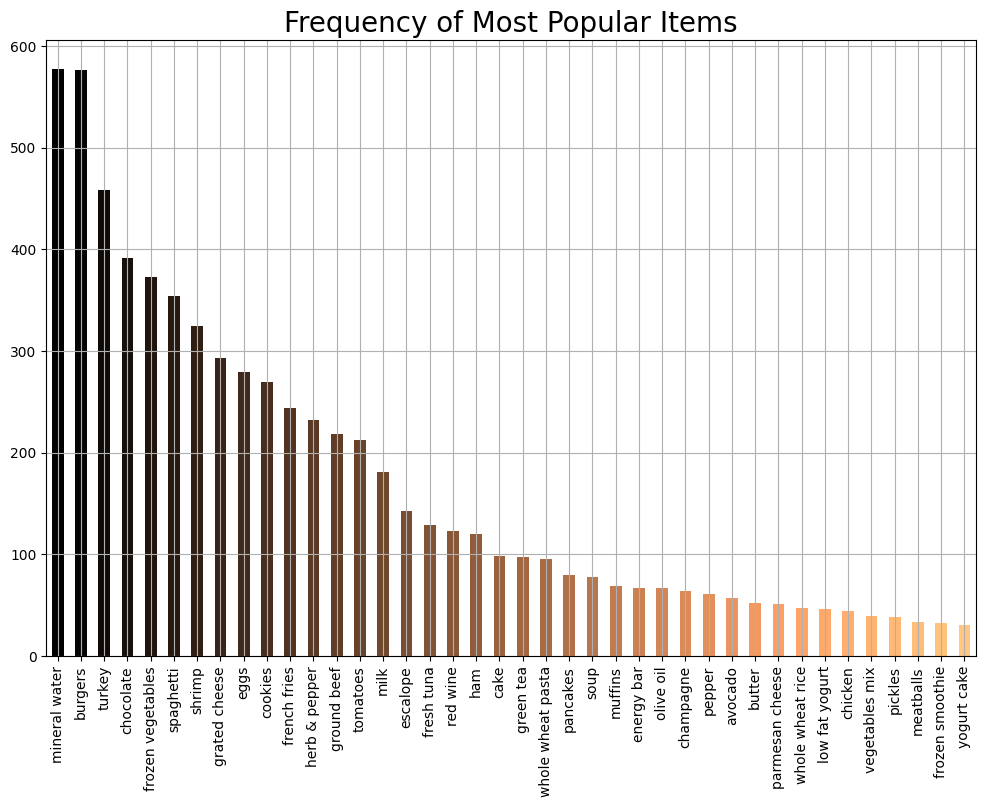

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

data=pd.read_csv('/content/store_data.csv',header=None)

print("Shape of tyhe dataset: ", data.shape)

print("First few rows of the dataset:")
print(data.head())

plt.rcParams['figure.figsize'] = (12, 8)

color = plt.cm.copper(np.linspace(0, 1, 40))

data[0].value_counts().head(40).plot.bar(color=color)

plt.title('Frequency of Most Popular Items', fontsize=20)

plt.xticks(rotation=90)

plt.grid()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dis

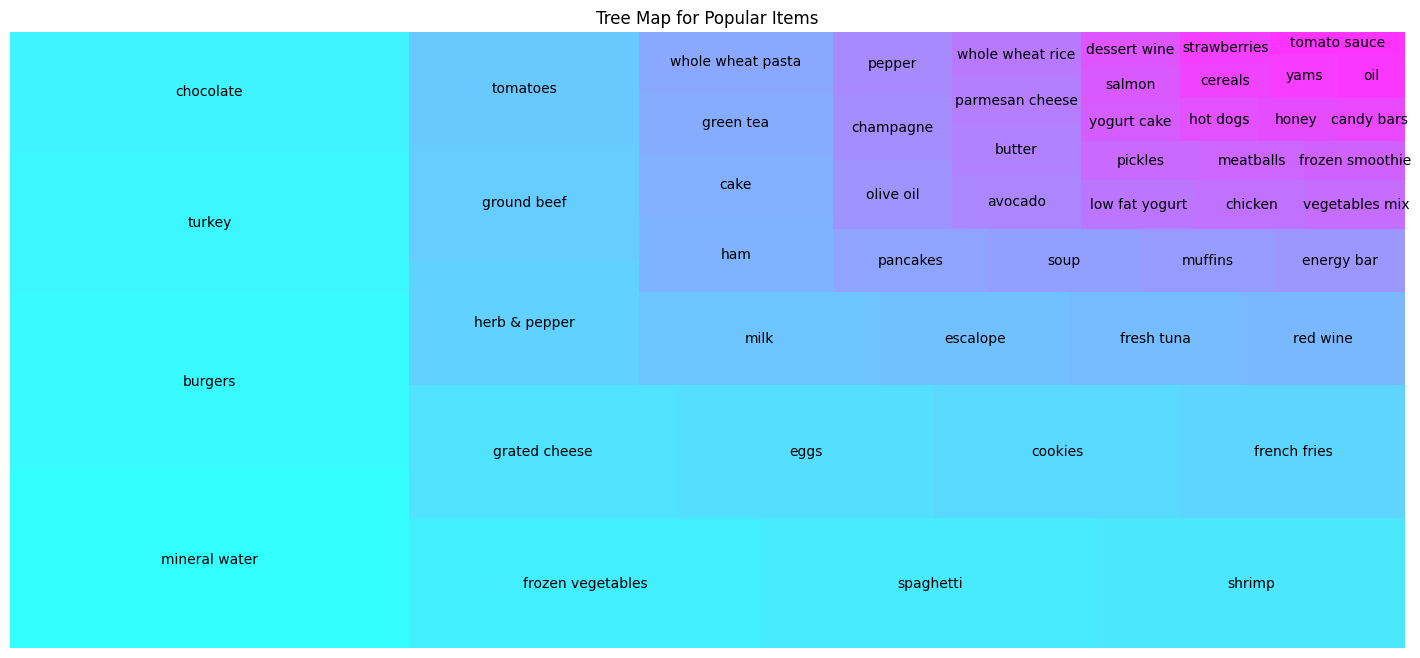

In [3]:
y = data[0].value_counts().head(50).to_frame()

y.index

plt.rcParams['figure.figsize'] = (18, 8)

color = plt.cm.cool(np.linspace(0, 1, 50))

squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)


plt.title('Tree Map for Popular Items')

plt.axis('off')

plt.show()

In [4]:
data['food'] = 'Food'

food = data.truncate(before=-1, after=15)

import networkx as nx

food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [7]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

pos = nx.spring_layout(food)

color = plt.cm.Wistia(np.linspace(0, 15, 1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


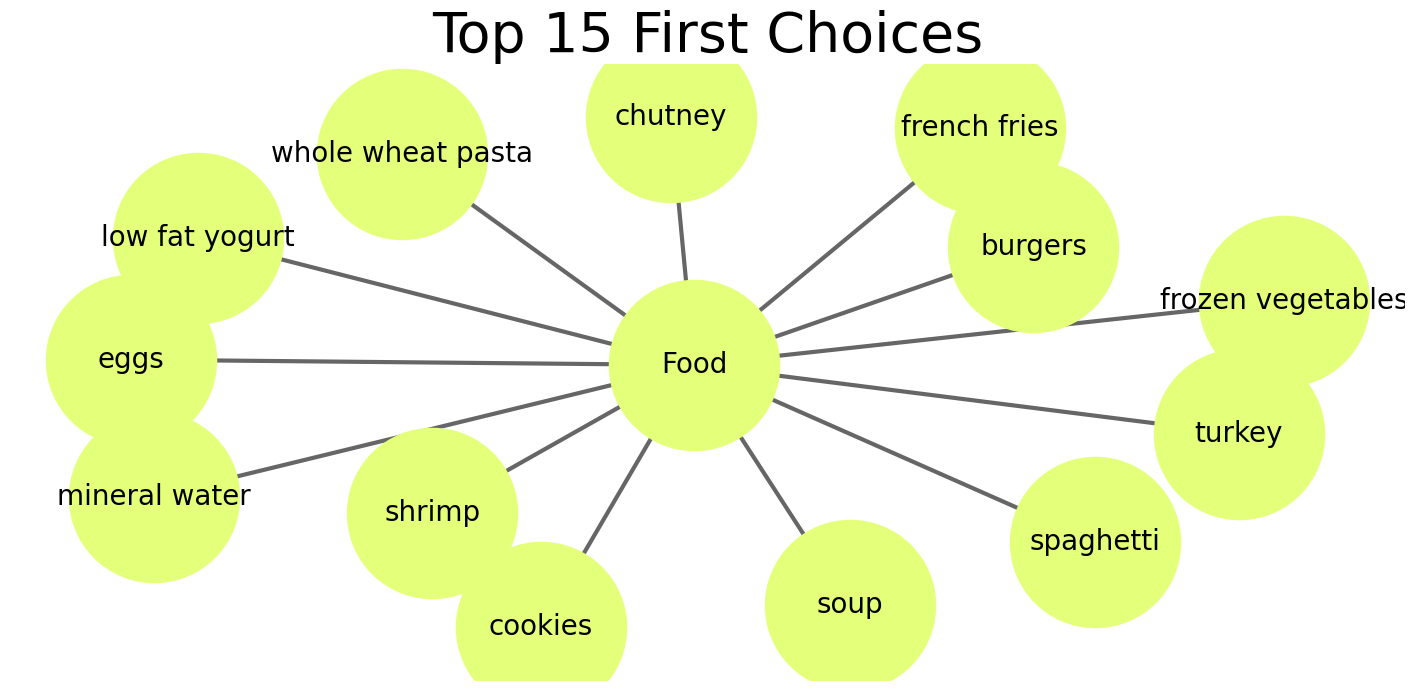

In [8]:
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)

nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black',)

nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')

plt.axis('off')

plt.grid()

plt.title('Top 15 First Choices', fontsize=40)

plt.show()

transactions = []
for i in range(len(data)):
 transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])

te = TransactionEncoder()

te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)

Frequent Itemsets with at least 5% support:
      support                               itemsets
0    1.000000                                 (Food)
1    0.087188                              (burgers)
2    0.081056                                 (cake)
3    0.059992                              (chicken)
4    0.163845                            (chocolate)
..        ...                                    ...
110  0.050927             (mineral water, nan, eggs)
111  0.059725        (mineral water, spaghetti, nan)
112  0.052660  (mineral water, nan, Food, chocolate)
113  0.050927       (mineral water, nan, Food, eggs)
114  0.059725  (mineral water, spaghetti, nan, Food)

[115 rows x 2 columns]
